학습 플랫폼 이용자 구독 갱신 예측 해커톤

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv('../Project/Subscribe/data_info.csv')
data_info

,column,description
0,user_id,사용자의 고유 식별자
1,subscription_duration,사용자가 서비스에 가입한 기간 (월)
2,recent_login_time,사용자가 마지막으로 로그인한 시간 (일)
3,average_login_time,사용자의 일반적인 로그인 시간
4,average_time_per_learning_session,각 학습 세션에 소요된 평균 시간 (분)
5,monthly_active_learning_days,월간 활동적인 학습 일수
6,total_completed_courses,완료한 총 코스 수
7,recent_learning_achievement,최근 학습 성취도
8,abandoned_learning_sessions,중단된 학습 세션 수
9,community_engagement_level,커뮤니티 참여도


In [3]:
train = pd.read_csv('../Project/Subscribe/train.csv')
test = pd.read_csv('../Project/Subscribe/test.csv')
train.head(10)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,Low,Premium,1,1,1
8,9e6713d2,20,4,12.624582,37.384210,8,8,63.624395,4,4,High,Basic,0,0,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [5]:
#결측치 확인
train.isnull().sum()

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

In [6]:
train.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [7]:
train.describe(include=['object'])

,user_id,preferred_difficulty_level,subscription_type
count,10000,10000,10000
unique,10000,3,2
top,b919c29d,Low,Basic
freq,1,4992,5979


In [8]:
train['target'].value_counts()

target
1    6199
0    3801
Name: count, dtype: int64

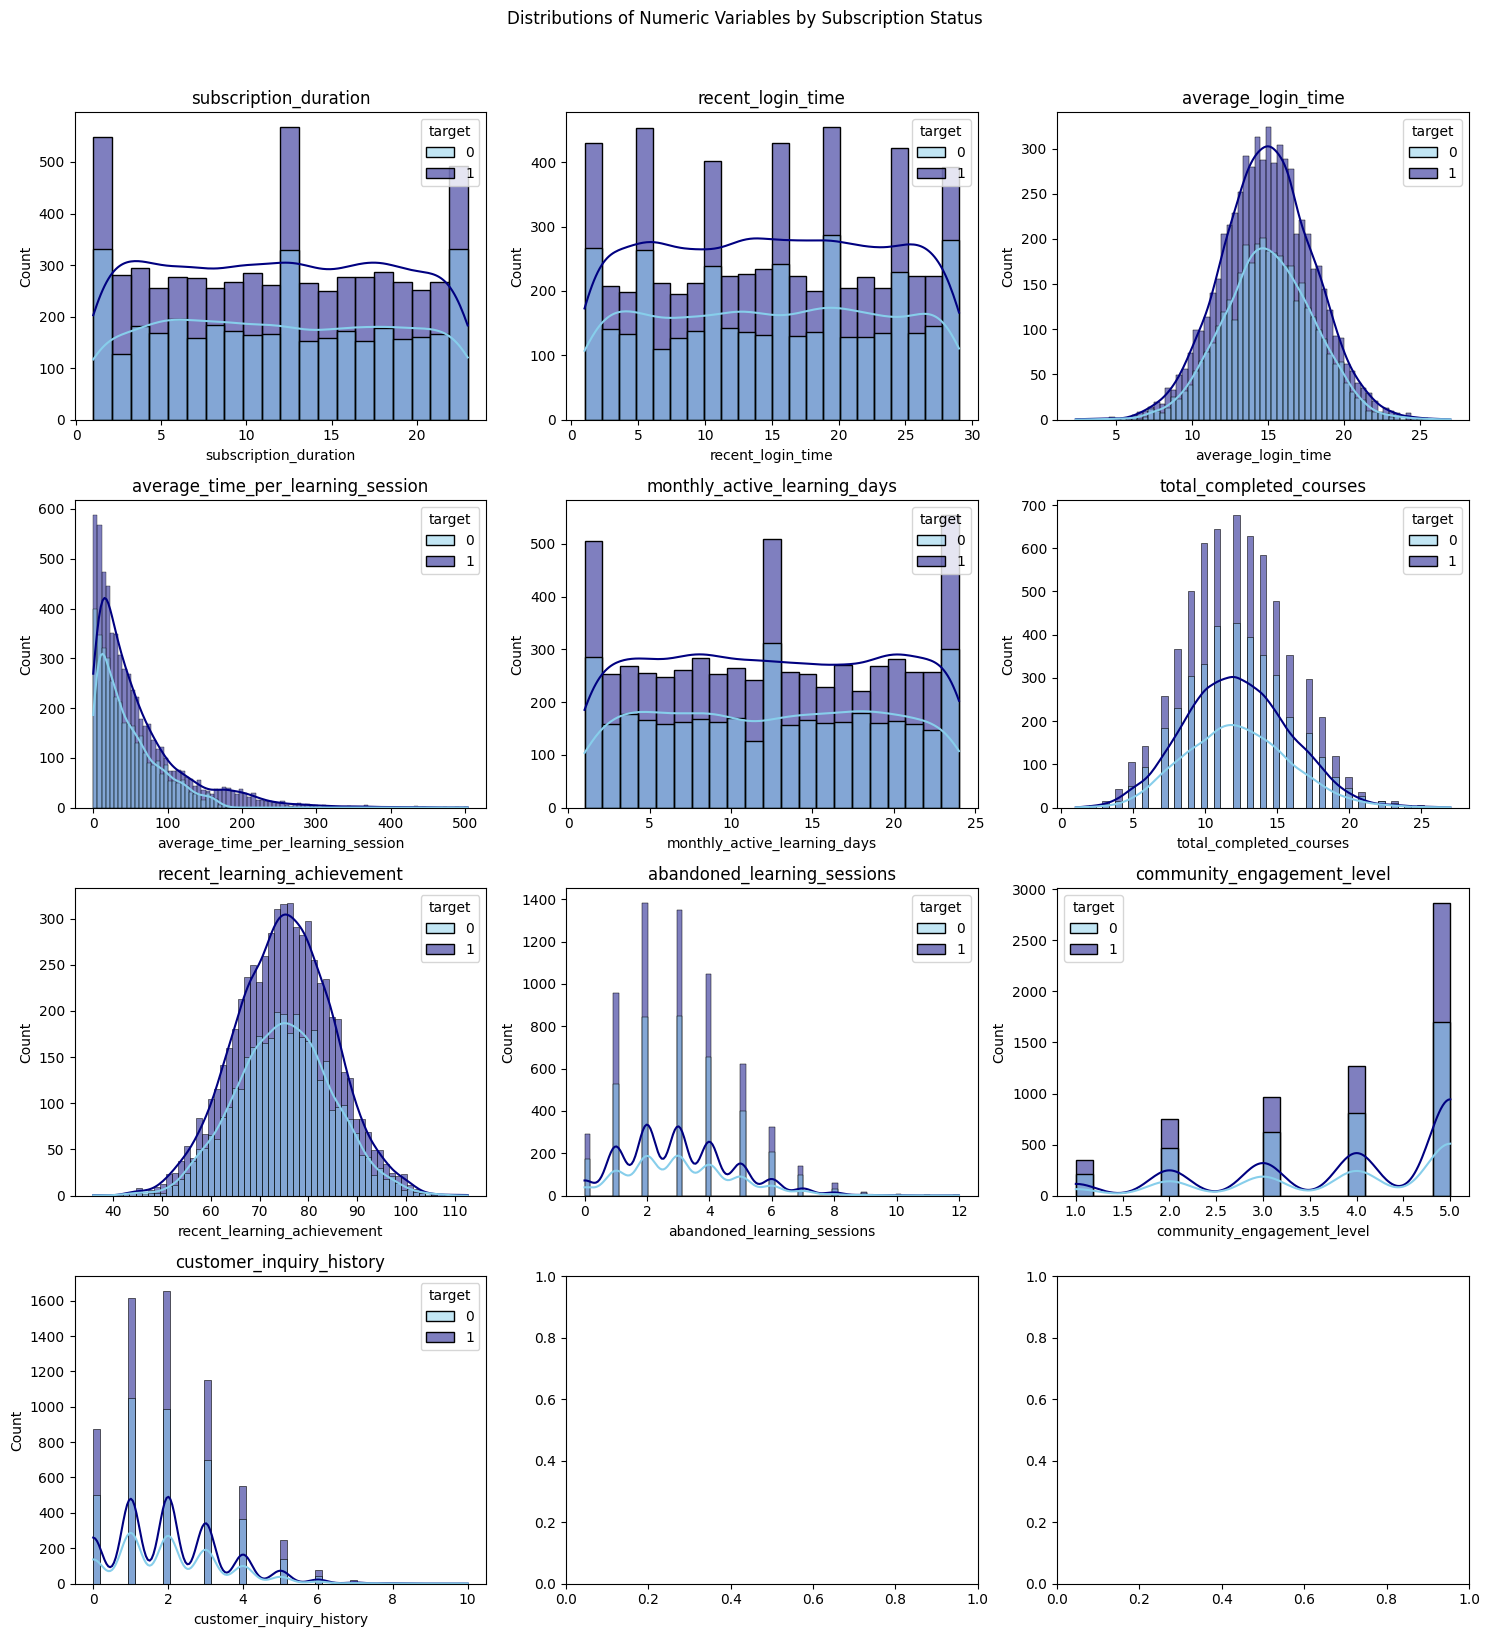

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a diverging custom palette with light blue and dark blue
custom_palette = sns.color_palette(['#87CEEB', 'navy'])

# 구독 여부별 수치형 변수 분포 확인
fig, ax = plt.subplots(4, 3, figsize=(15, 16))
fig.suptitle('Distributions of Numeric Variables by Subscription Status', y=1.02)

# 수치형 변수와 구독 여부의 관계 시각화
numeric_columns = ['subscription_duration', 'recent_login_time', 'average_login_time',
                   'average_time_per_learning_session', 'monthly_active_learning_days',
                   'total_completed_courses', 'recent_learning_achievement',
                   'abandoned_learning_sessions', 'community_engagement_level',
                   'customer_inquiry_history']

# 각 수치형 변수에 대한 히스토그램 그리기
for i, column in enumerate(numeric_columns):
    row_index = i // 3
    col_index = i % 3

    sns.histplot(data=train, x=column, hue=train['target'], kde=True, ax=ax[row_index, col_index], palette=custom_palette)
    ax[row_index, col_index].set_title(f'{column}')

# 레이아웃 조정
plt.tight_layout()
plt.show()


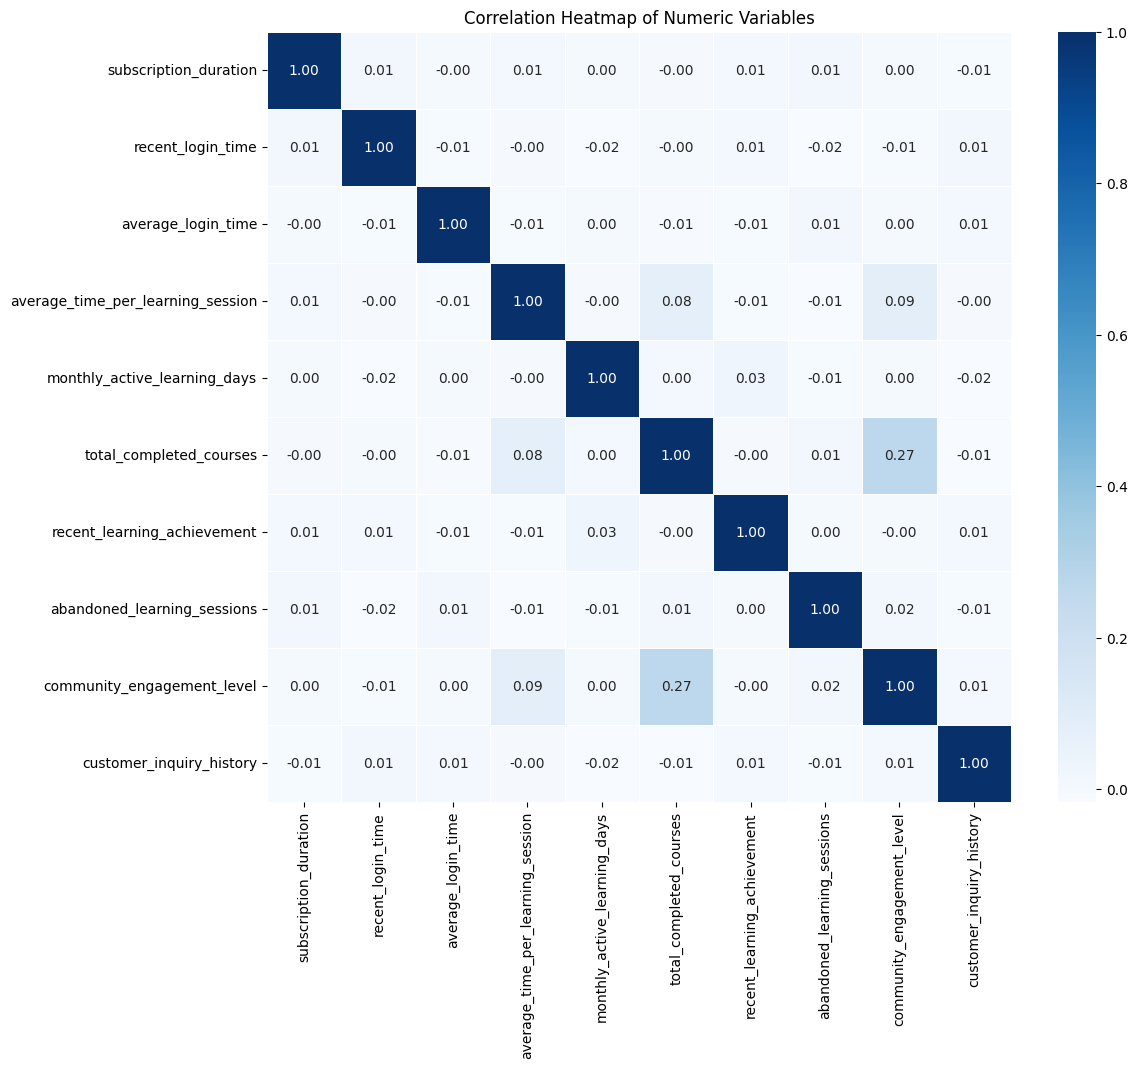

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수 간의 상관 행렬 계산
correlation_matrix = train[numeric_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


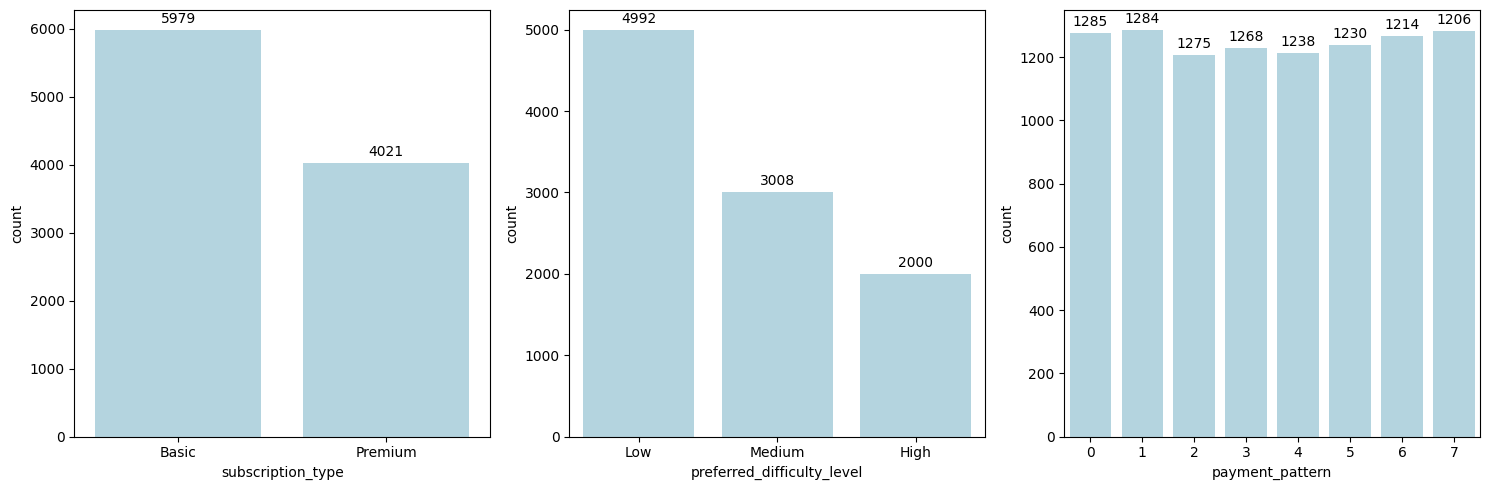

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sub = train['subscription_type'].value_counts()
prefer = train['preferred_difficulty_level'].value_counts()
pay = train['payment_pattern'].value_counts()

categorical_train = train[['preferred_difficulty_level', 'subscription_type', 'payment_pattern']]
data_counts = [sub, prefer, pay]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, (category, data_count) in enumerate(zip(categorical_train, data_counts)):
    sns.barplot(x=data_count.index, y=data_count, ax=axes[i], color='lightblue')
    for bar, count in zip(axes[i].patches, data_count):
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01 * max(data_count),
            f'{count}',
            ha='center',
            va='bottom'
        )

plt.tight_layout()
plt.show()


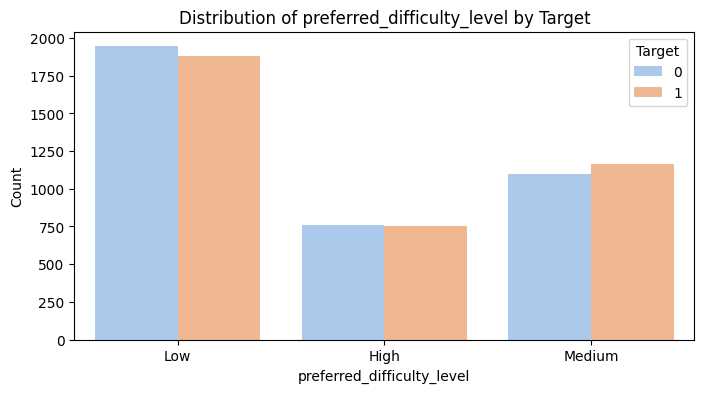

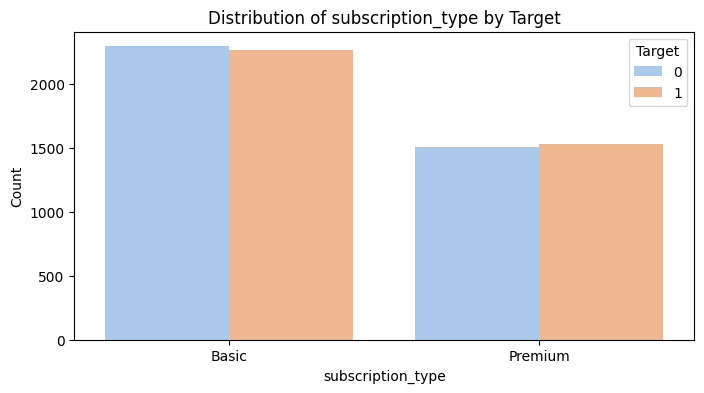

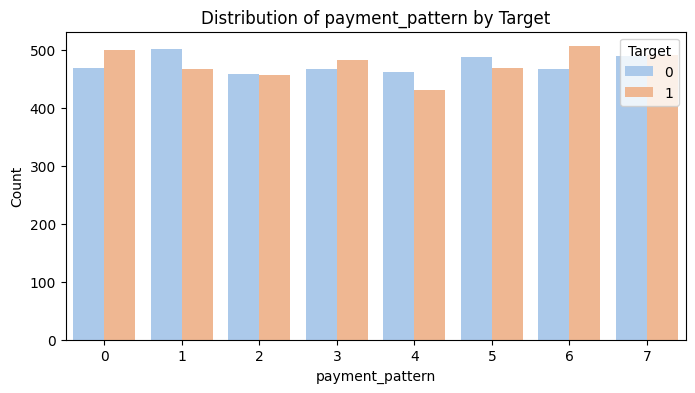

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_categorical_data(train, categorical_col):
    train0 = train[train['target'] == 0]
    train1 = train[train['target'] == 1].sample(3801)

    train = pd.concat([train0, train1])
    plt.figure(figsize=(8, 4))

    # Create a count plot with 'target' as hue and set a light color palette
    sns.countplot(x=categorical_col, hue='target', data=train, palette='pastel')

    # Formatting the plot
    plt.title(f'Distribution of {categorical_col} by Target')
    plt.xlabel(categorical_col)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')

    # Display the plot
    plt.show()

# Example usage with different categorical columns
compare_categorical_data(train, 'preferred_difficulty_level')
compare_categorical_data(train, 'subscription_type')
compare_categorical_data(train, 'payment_pattern')


/var/folders/mn/kst2r3t54ws09n_vzmr79q740000gn/T/ipykernel_96952/411689816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=train, ax=axes[i // 5, i % 5], palette='pastel')
/var/folders/mn/kst2r3t54ws09n_vzmr79q740000gn/T/ipykernel_96952/411689816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=train, ax=axes[i // 5, i % 5], palette='pastel')
/var/folders/mn/kst2r3t54ws09n_vzmr79q740000gn/T/ipykernel_96952/411689816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', 

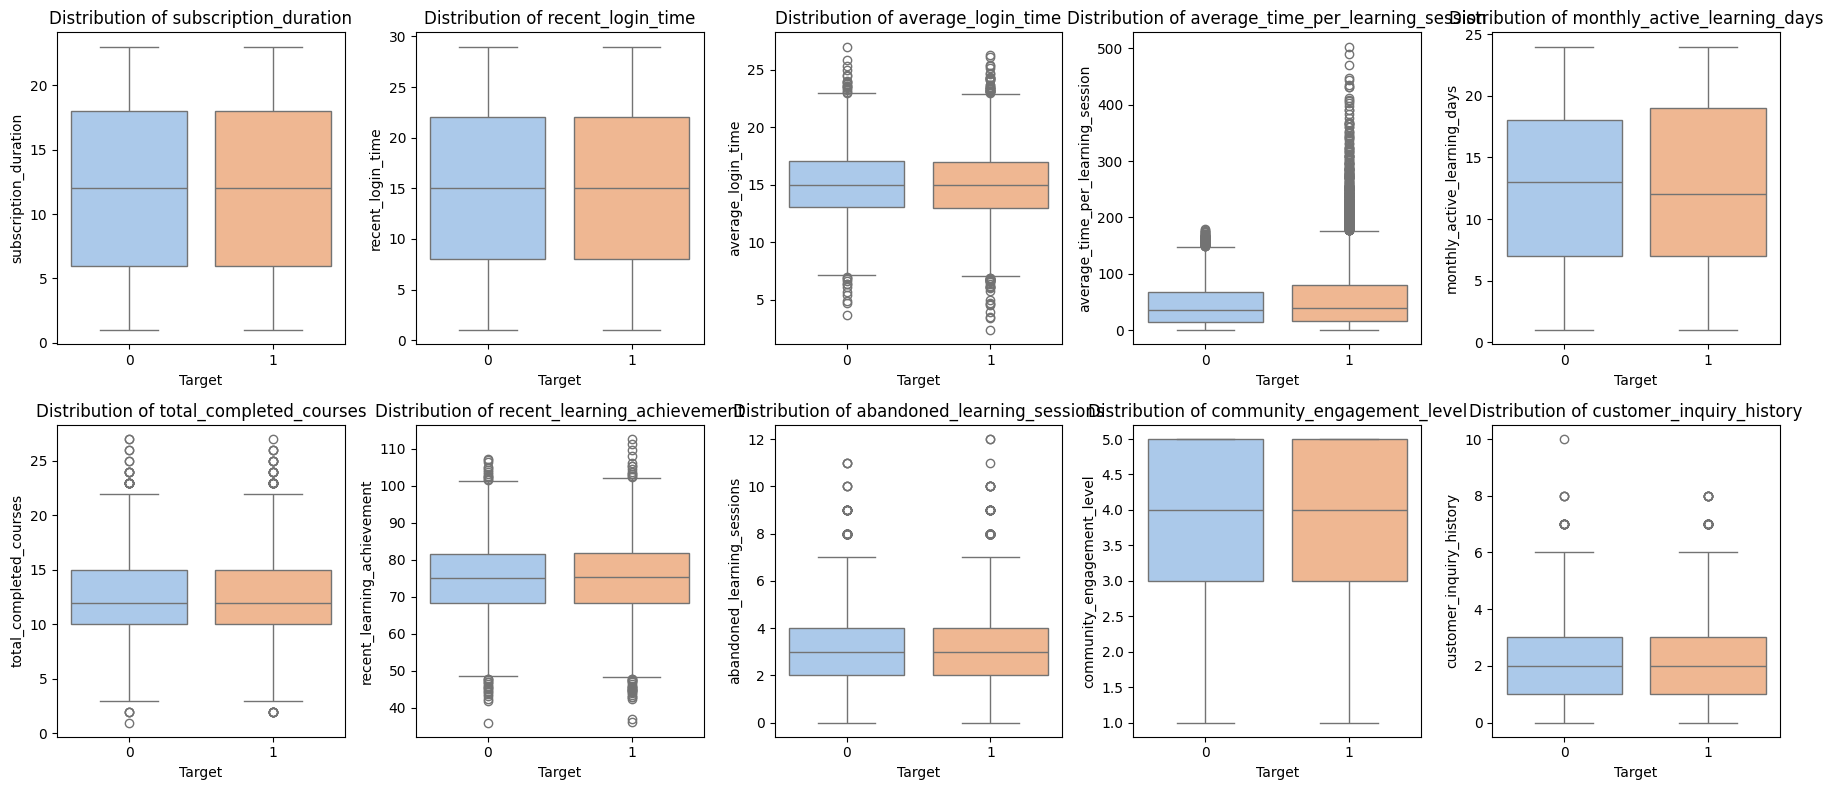

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))

for i, feature in enumerate(numeric_columns):
    sns.boxplot(x='target', y=feature, data=train, ax=axes[i // 5, i % 5], palette='pastel')
    axes[i // 5, i % 5].set_title(f'Distribution of {feature}')
    axes[i // 5, i % 5].set_xlabel('Target')
    axes[i // 5, i % 5].set_ylabel(feature)

plt.tight_layout()
plt.show()
